In [11]:
!pip install scikit-image

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import morphology, io
from skimage.transform import rescale, resize, downscale_local_mean

import os

In [13]:
im = plt.imread('../data/raw/example_image/ISIC_0001769.jpg')
mask=plt.imread('../data/raw/example_segmentation/ISIC_0001769_segmentation.png')


In [29]:

for filename in os.listdir('../data/raw/example_image'):
    if 'DS' in filename:
        continue
    temp = plt.imread('../data/raw/example_image/'+filename)
    temp_resized = resize(temp, (768, 1024),
                       anti_aliasing=True)

    new_filename = filename[:5]+"re_"+filename[5:]                 
    io.imsave('../data/interim'+new_filename,temp_resized)





Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

3.545708406819518 %


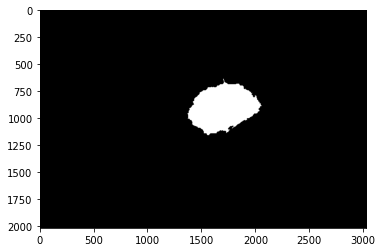

In [14]:
#Total size of the image
total = mask.shape[0] * mask.shape[1] 

#Size of mask only
area = np.sum(mask)

#As percentage
print(area/total*100, "%")

plt.imshow(mask, cmap='gray')

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]
216160.0
212178


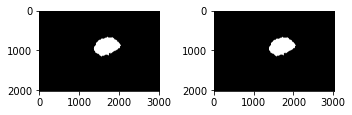

In [15]:
# Altea got the perimeter <3 <3


#Structural element, that we will use as a "brush" on our mask. The parameter is "brush size"
struct_el = morphology.disk(2)

print(struct_el)



# Use this "brush" to erode the image - eat away at the borders

mask_eroded = morphology.binary_erosion(mask, struct_el)

# Show side by side (depending on brush size, you might not see a difference visually)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(mask, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

# Verify the new mask is smaller
new_area= np.sum(mask_eroded)

print(area)
print(new_area)


3982.0


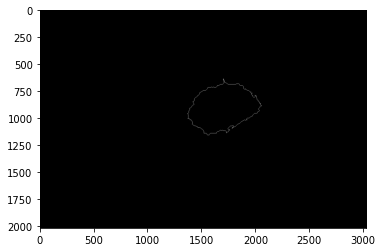

In [16]:
# Subtract the two masks from each other to get the border/perimeter

image_perimeter = mask - mask_eroded

plt.imshow(image_perimeter, cmap='gray') #Depending on the size of the "brush" it might be difficult to see on the screen

#What is the length of this perimeter = how many 1s? 
print(np.sum(image_perimeter))

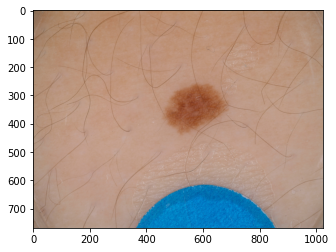

In [27]:
image_resized = resize(im, (im.shape[0] // 4, im.shape[1] // 4),
                       anti_aliasing=True)

plt.imshow(image_resized)




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d3cba4d-030c-46c0-9c7d-8130179a7111' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>